In [1]:
import pandas as pd
import seaborn as sb
import sklearn.linear_model as skl
import sklearn.tree as skt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = sb.load_dataset('diamonds')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


<AxesSubplot:xlabel='cut', ylabel='count'>

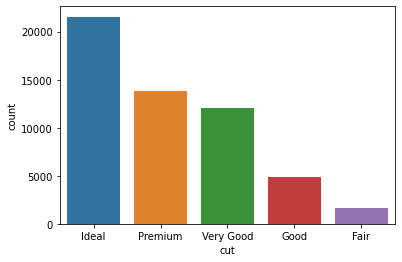

In [17]:
sb.countplot(data=df,x="cut")

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [18]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<AxesSubplot:>

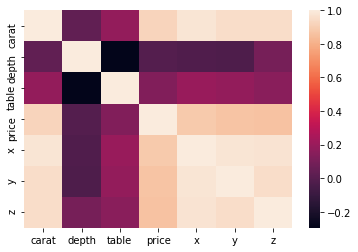

In [22]:
sb.heatmap(df.corr())

In [23]:
model = skl.LinearRegression()

In [25]:
X = df.drop(['cut','color','clarity','price'],axis=1)
y = df['price']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
model.fit(X_train,y_train)

LinearRegression()

In [28]:
pred = model.predict(X_test)

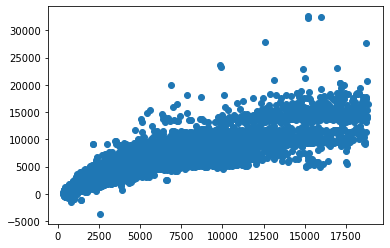

In [29]:
plt.scatter(y_test,pred)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

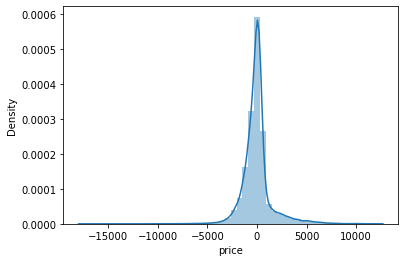

In [30]:
sb.distplot(y_test - pred)

In [31]:
model.score(X_test,y_test)

0.8590734011857275

In [32]:
df = pd.get_dummies(df,columns=['cut','clarity','color'])

In [33]:
df.head()

,carat,depth,table,price,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,...,clarity_SI1,clarity_SI2,clarity_I1,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,61.5,55.0,326,3.95,3.98,2.43,1,0,0,...,0,1,0,0,1,0,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   x              53940 non-null  float64
 5   y              53940 non-null  float64
 6   z              53940 non-null  float64
 7   cut_Ideal      53940 non-null  uint8  
 8   cut_Premium    53940 non-null  uint8  
 9   cut_Very Good  53940 non-null  uint8  
 10  cut_Good       53940 non-null  uint8  
 11  cut_Fair       53940 non-null  uint8  
 12  clarity_IF     53940 non-null  uint8  
 13  clarity_VVS1   53940 non-null  uint8  
 14  clarity_VVS2   53940 non-null  uint8  
 15  clarity_VS1    53940 non-null  uint8  
 16  clarity_VS2    53940 non-null  uint8  
 17  clarity_SI1    53940 non-null  uint8  
 18  clarit

In [37]:
X = df.drop(['price'],axis=1)
y = df['price']

In [38]:
model = skt.DecisionTreeRegressor()

In [39]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model.fit(X_train,y_train)
pred = model.predict(X_test)
model.score(X_test,y_test)

0.9647358734229656